# 로지스틱 회귀 (LogisticRegression)
- 선형회귀 알고리즘을 이용한 이진 분류 모델
- Sample이 특정 클래스에 속할 확률을 추정한다.    
    

## 확률 추정
- 선형회귀 처럼 입력 특성(Feature)에 가중치 합을 계산한 값을 로지스틱 함수를 적용해 확률을 계산한다.


$$
\hat{p} = \sigma \left( \mathbf{w}^{T} \cdot \mathbf{X} + \mathbf{b} \right)\\
\hat{p}:\: positive의\,확률,\quad \sigma():\:logistic\,함수,\quad \mathbf{w}:\:weight,\quad \mathbf{X}:\:input feature,\quad \mathbf{b}:\:bias
$$

### 로지스틱 함수
- 0과 1사이의 실수를 반환한다.
- S 자 형태의 결과를 내는 **시그모이드 함수(sigmoid function)** 이다.

$$
\sigma(x) = \frac{1}{1 + \mathbf{e}^{-x}}
$$

- 샘플 **x**가 양성에 속할 확률

$$
\hat{y} = \begin{cases} 0\quad\hat{p}<0.5\\1\quad\hat{p}\geqq0.5 \end{cases}
$$

##### logistic 함수 시각화

In [1]:
import matplotlib.pyplot as plt
import numpy as np

def logistic_func(X):
    return 1 / (1 + np.exp(-X))  

X = np.linspace(-10, 10, 1000) 
y = logistic_func(X)

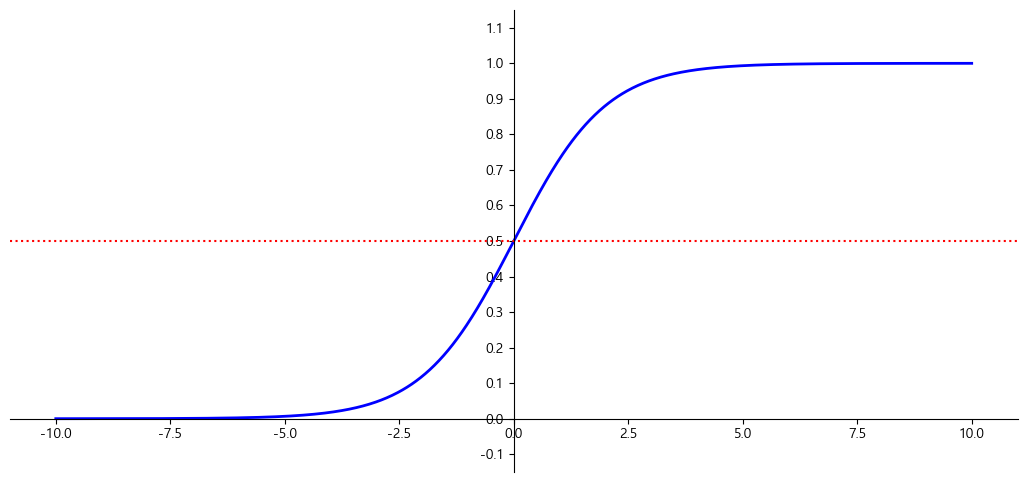

In [8]:
plt.figure(figsize=(13, 6))

plt.plot(X, y, color='b', linewidth=2)

plt.axhline(y=0.5, color='r', linestyle=':')

plt.ylim(-0.15, 1.15)
plt.yticks(np.arange(-0.1,1.2,0.1))

ax = plt.gca()
ax.spines['left'].set_position("center")
ax.spines['bottom'].set_position(('data', 0.0))
# ax.spines['bottom'].set_color('blue')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.show()

In [9]:
np.min(y), np.max(y)

(4.5397868702434395e-05, 0.9999546021312976)

## LogisticRegression의 손실 함수(Loss Function)
- **Cross Entropy(로그손실-log loss)**
    - 모델이 예측한 정답의 확률에 대해 log를 취해 손실값을 구한다.
        - 확률이 틀리면 틀릴 수록 손실값을 크게 만들기 위해서 log를 취한다.


$$
\log{\left(모델이\,예측한\,정답에\,대한\,확률\right)}
$$


- **Binary Cross Entropy**
    - Logistic 함수를 이용한 추론 결과에 대한 cross entropy 계산
        - Logistic함수은 positive(1)의 확률만 추출하므로 정답이 0일때, 1일때 계산하는 것이 다르다. 그것을 하나의 공식으로 정의한 것이 binary cross entropy이다.
$$
L(\mathbf{W}) = - \frac{1}{m} \sum_{i=1}^{m}{\left[ y_{i} \log{\left( \hat{p}_i \right)} + \left( 1 - y_i \right) \log{\left( 1 - \hat{p}_i \right)} \right]}\\
y:\:실제값(정답),\quad\hat{p}:\:예측확률(양성확률)
$$

- y(실제값) 이 1인 경우 $y_{i}\log{\left(\hat{p}_i\right)}$ 이 손실을 계산
- y가 0인 경우 $\left( 1 - y_i \right) \log{\left( 1 - \hat{p}_i \right)}$이 손실을 계산
- $\hat{p}$(예측확률)이 클수록 반환값은 작아지고 작을 수록 값이 커진다. 

> - **Loss Function**
>   - 모델이 예측한 값과 정답간의 차이(오차, loss)를 구하는 함수.
>   - 모델의 파라미터를 최적화할 때 loss를 최소화하는 것을 목적으로 한다.
> 

In [15]:
np.log(0.0000000000000000000000001)  # 밑: e

-57.564627324851145

In [19]:
-np.log(1), -np.log(0.9), -np.log(0.8), -np.log(0.5001)

(0.0, -0.10536051565782628, -0.2231435513142097, -0.6929472005572791)

In [24]:
np.log(0.4999), np.log(0.1), np.log(0.000000000000000000000000001) 

(-0.6933472005626123, -2.3025850929940455, -62.16979751083923)

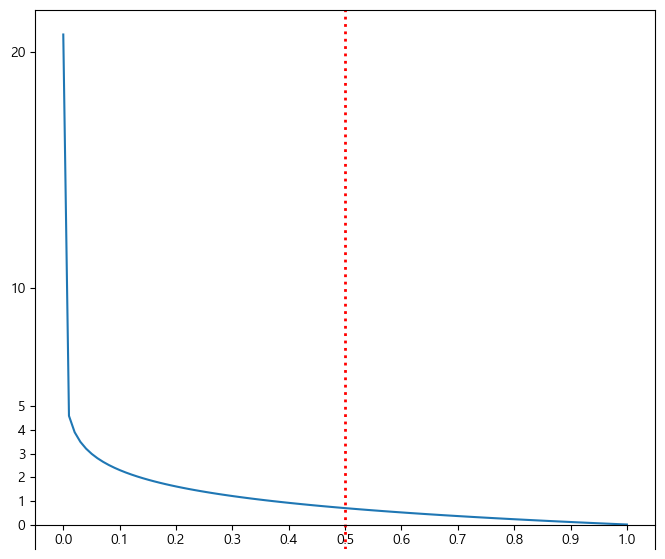

In [26]:
import numpy as np
import matplotlib.pyplot as plt

X = np.linspace(0.000000001, 1, 100)   # 정답의 확률(X값)
y = -np.log(X)                         # 오차(log loss)

plt.figure(figsize=(8,7))
plt.plot(X, y)
plt.axvline(0.5, linestyle=':', linewidth=2, color='r')

plt.xticks(np.arange(0,1.1,0.1))
plt.yticks([0,1,2,3,4,5,10,20])
plt.gca().spines['bottom'].set_position(("data", 0))
plt.show()

## 최적화 

### 최적화란
- 모델이 예측한 결과와 정답간의 차이(오차)를 가장 적게 만드는 Parameter를 찾는 과정을 최적화라고 한다.
- 모델의 예측값과 실제 값의 차이를 계산하는 함수를 만들고 그 값이 최소가 되는 지점을 찾는 작업을 한다.

### 목적함수(Object Function), 손실함수(Loss Function), 비용함수(Cost Function), 오차함수(Error Function)
- 모델의 예측한 값과 실제값 사이의 차이를 정의하는 함수로 모델이 학습할 때 사용된다.
- 이 함수의 반환값(Loss)을 최소화 하는 파라미터을 찾는 것이 최적화의 목적
- 해결하려는 문제에 맞춰 Loss 함수를 정의한다.
    - Classification(분류)의 경우 cross entropy(log loss)를 사용한다.
    - Regression(회귀)의 경우 MSE(Mean Squared Error)를 사용한다.

### LogisticRegression의 최적화
- 분류 문제이므로 Cross entropy(Log loss함수)를 손실함수로 사용한다.
- Cross entropy는 loss의 최소값으로 하는 parameter 찾는 방정식이 없기 때문에 **LogisticRegression은 경사하강법을 이용해 최적화를 진행한다.**
- 로그 손실을 $\mathbf{W}$로 미분하면 다음과 같다.
    - 아래 도함수로 기울기를 구해 기울기가 0이 될 때 까지 W(가중치)들을 update한다.
$$
\frac{\partial}{\partial w_j}L(W) = \frac{1}{m} \sum_{i=1}^{m}{\left( \sigma \left( \mathbf{W}^{T} \cdot \mathbf{x}_i \right) - \mathbf{y}_i \right)} x_{ij}
$$

## LogisticRegression 주요 하이퍼파라미터
- penalty: 과적합을 줄이기 위한 규제방식
    - 'l1', 'l2'(기본값), 'elasticnet', 'none' 
- C: 규제강도(기본값 1) - 작을 수록 규제가 강하다(단순).
- max_iter(기본값 100) : 경사하강법 반복횟수

## 예제

In [10]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from metrics import print_metrics_classification as pmc, print_metrics_classification2 as pmc2

In [3]:
data = load_breast_cancer()
X, y = data.data, data.target
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=1)

##### 데이터 전처리
- LogisticRegression은 선형회귀 기반의 알고리즘이므로 연속형 Feature는 Feature scaling, 범주형 Feature는 One hot encoding 처리를 한다.

In [4]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

##### 모델 생성, 학습, 추론, 평가

In [6]:
lr = LogisticRegression(random_state=0)
lr.fit(X_train_scaled, y_train)

LogisticRegression(random_state=0)

In [7]:
lr.coef_

array([[-0.52050499, -0.36615878, -0.4939158 , -0.55347301, -0.11689325,
         0.39606585, -0.664654  , -0.69918098, -0.07298582,  0.41318141,
        -1.18920004, -0.15821728, -0.72481315, -0.82728931, -0.25980503,
         0.79888346,  0.06023541, -0.35962216,  0.40281009,  0.54714781,
        -0.99201681, -1.14939407, -0.80607041, -0.9802556 , -0.45574434,
        -0.11419008, -0.9739106 , -0.89225807, -1.0782568 , -0.33572203]])

In [8]:
lr.intercept_

array([0.32659714])

In [9]:
train_pred = lr.predict(X_train_scaled)
test_pred = lr.predict(X_test_scaled)

pmc(y_train, train_pred, "Train set")
pmc(y_test, test_pred, "-----------Test set---------------")

Train set
정확도(accuracy): 0.9906103286384976
재현율/민감도(recall): 0.9962546816479401
정밀도(precision): 0.9888475836431226
F1-score: 0.9925373134328358
-----------Test set---------------
정확도(accuracy): 0.965034965034965
재현율/민감도(recall): 0.9777777777777777
정밀도(precision): 0.967032967032967
F1-score: 0.9723756906077348


In [12]:
train_proba = lr.predict_proba(X_train_scaled)
test_proba = lr.predict_proba(X_test_scaled)

In [14]:
pmc2(y_train, train_proba[:, 1], '----------train set')
pmc2(y_test, test_proba[:, 1], '------------test set')

----------train set
Average Precision: 0.9981792069771064
roc_auc: 0.9974088992532919
------------test set
Average Precision: 0.9975489995454901
roc_auc: 0.9958071278825996


##### GridSearchCV를 이용해 하이퍼파라미터 탐색
- C

In [15]:
LogisticRegression?

In [23]:
params = {
    "penalty":['l1', 'l2'], 
    "C":[0.01, 0.1, 1, 5, 10]    
}
gs = GridSearchCV(LogisticRegression(random_state=0, solver='liblinear'), 
                  params, 
                  scoring=['accuracy', 'recall', 'precision'],
                  refit='recall', 
                  cv=4, 
                  n_jobs=-1)
gs.fit(X_train_scaled, y_train)

GridSearchCV(cv=4,
             estimator=LogisticRegression(random_state=0, solver='liblinear'),
             n_jobs=-1,
             param_grid={'C': [0.01, 0.1, 1, 5, 10], 'penalty': ['l1', 'l2']},
             refit='recall', scoring=['accuracy', 'recall', 'precision'])

In [24]:
gs.best_params_

{'C': 0.1, 'penalty': 'l2'}

In [25]:
gs.best_score_

0.9924242424242424

In [26]:
import pandas as pd
result = pd.DataFrame(gs.cv_results_)
result.sort_values('rank_test_recall').head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_penalty,params,split0_test_accuracy,split1_test_accuracy,split2_test_accuracy,...,mean_test_recall,std_test_recall,rank_test_recall,split0_test_precision,split1_test_precision,split2_test_precision,split3_test_precision,mean_test_precision,std_test_precision,rank_test_precision
3,0.003096,0.000398,0.003959,0.000477,0.1,l2,"{'C': 0.1, 'penalty': 'l2'}",0.990654,0.981308,0.971698,...,0.992424,0.013122,1,0.985294,0.971014,0.957143,0.969697,0.970787,0.009973,3
5,0.004075,0.000436,0.004005,0.001077,1,l2,"{'C': 1, 'penalty': 'l2'}",0.962617,0.981308,0.990566,...,0.988693,0.012546,2,0.956522,0.971014,0.985294,0.969697,0.970632,0.010187,5
4,0.003937,0.000545,0.004102,0.000331,1,l1,"{'C': 1, 'penalty': 'l1'}",0.971963,0.981308,0.971698,...,0.984905,0.018557,3,0.970588,0.971014,0.957143,0.969231,0.966994,0.005726,8
8,0.016201,0.003801,0.004212,0.000646,10,l1,"{'C': 10, 'penalty': 'l1'}",0.953271,0.971963,0.962264,...,0.977499,0.007577,4,0.942857,0.984848,0.956522,0.969697,0.963481,0.015564,9
6,0.006446,0.001177,0.004379,0.000887,5,l1,"{'C': 5, 'penalty': 'l1'}",0.953271,0.981308,0.962264,...,0.977442,0.013220,5,0.942857,0.985075,0.956522,0.984375,0.967207,0.018173,7
